# Ensemble Learning and Random Forests

 Extrait du livre d'Aurélien Géron

## Setup

### The top-cell

In [0]:
%reset -f
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.svm
import sklearn.ensemble
import sklearn.datasets
import sklearn.tree
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network



plt.style.use("default")


"data for the whole notebook"
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)



def plot_decision_boundary(ax,prediction_func, X, y, title="", extent=[-2, 3, -2, 2],alpha=0.5,plot_data=True):
    
    x1s = np.linspace(extent[0], extent[1], 100)
    x2s = np.linspace(extent[2], extent[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.stack([x1.reshape(-1), x2.reshape(-1)],axis=1)
    y_pred = prediction_func(X_new).reshape(x1.shape)
    
    ax.imshow(y_pred,extent=extent,origin="lower",interpolation="bilinear",cmap="jet",alpha=alpha)
            
    if plot_data:
      ax.scatter(X[:, 0],X[:, 1],marker=".",c=y,cmap="jet",linewidths=0)
      ax.set_title(title)
      ax.set_xlabel(r"$x_1$", fontsize=18)
      ax.set_ylabel(r"$x_2$", fontsize=18)



### Look at data

 Instances belong to two caterories. There are two inputs. 

X_train.shape: (375, 2)
X_test.shape: (125, 2)


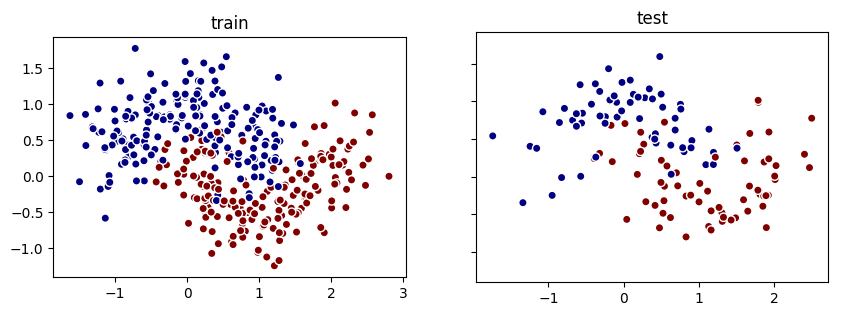

In [0]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5),sharey=True)

def plot_one(ax,X,y,title):
  ax.scatter(
      X[:,0],
      X[:,1],
      c=y,
      edgecolor="w",
      cmap="jet"
  )
  ax.set_title(title)
  ax.set_aspect("equal")
  
  
plot_one(ax0,X_train,y_train,"train")
plot_one(ax1,X_test,y_test,"test")
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)

## Voting classifiers

Suppose you ask a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This is called the wisdom of the crowd. 

***A vous:*** Traduisez $(1\heartsuit)$: "wisdom of the crowd".


Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.
For example, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that   gets the most votes. Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today. 


You will often use Ensemble methods near the end of a project, once you have already built a few good predictors, to combine them into an even better predictor. In fact, the winning solutions in Machine Learning competitions often involve several Ensemble methods (most famously in the Netflix Prize competition). 

***A vous:*** D'après vous: que fallait-il faire durant cette fameuse compétition Netlifx ($1\heartsuit$)? (essayez de deviner, n'allez pas sur internet pour si peu).


### Hard voting classifier

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more. A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.


Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.


How is this possible? The following analogy can help shed some light on this mystery. Suppose you have a slightly biased coin that has a 51% chance of coming up heads, and 49% chance of coming up tails. If you toss it   1000 times, you will generally get more or less 510 heads and 490 tails, and hence a majority of heads. If you do the math, you will find that the probability of obtaining a majority of heads after 1000 tosses is close to 75%. The more you toss the coin, the higher the probability (e.g., with 10,000 tosses, the probability climbs over 97%). This is due to the law of large numbers. 

***A vous:*** 
* Simuler l'expérience décrite ci-dessus. Vérifiez le coup des 75%/97%. 
* Donnez une expression mathématique (à base de coefficients binomiaux) pour calculer ces 75%/97%. Puis donnez une manière d'approximer cette approximation numériquement (souvenirs de M1).

### Different type of classifier

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.


In [0]:
log_clf = sklearn.linear_model.LogisticRegression(random_state=42)
rnd_clf = sklearn.ensemble.RandomForestClassifier(random_state=42)
svm_clf = sklearn.svm.SVC(random_state=42)

voting_clf = sklearn.ensemble.VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [0]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [0]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, sklearn.metrics.accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: Fu

There you have it! The voting classifier slightly outperforms all the individual classifiers.

### Soft voting classifier

If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called soft voting. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. 


In [0]:
log_clf = sklearn.linear_model.LogisticRegression(random_state=42)
rnd_clf = sklearn.ensemble.RandomForestClassifier(random_state=42)
svm_clf = sklearn.svm.SVC(probability=True,random_state=42) #observez la variante ici


voting_clf = sklearn.ensemble.VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [0]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, sklearn.metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: Fu

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


***A vous:*** Comment adapteriez-vous les méthodes ensemble avec des regresseurs ($1\heartsuit$)? 

## Bagging ensembles

### Intro

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. 

* When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating). 
* When sampling is performed without replacement, it is called pasting.


Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set. Predictors can all be trained in parallel, via different CPU cores or even different servers. Similarly, predictions can be made in parallel. This is one of the reasons why bagging and pasting are such popular methods: they scale very well.


### Coding

The following code trains an ensemble of 500 Decision Tree classifiers, each trained on 100 training instances randomly sampled from the training set with replacement (this is an example of bagging, but if you want to use pasting instead, just set `bootstrap=False`). The `n_jobs` parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores) 

In [0]:
bag_clf = sklearn.ensemble.BaggingClassifier(
    sklearn.tree.DecisionTreeClassifier(random_state=42), 
    n_estimators=500,
    max_samples=100, 
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [0]:
print("accuracy_score with:",sklearn.metrics.accuracy_score(y_test, y_pred))

accuracy_score with: 0.904


In [0]:
tree_clf = sklearn.tree.DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("accuracy_score without:",sklearn.metrics.accuracy_score(y_test, y_pred_tree))

accuracy_score without: 0.856


***Note:*** The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a `predict_proba()` method), which is the case with Decision Trees classifiers. 

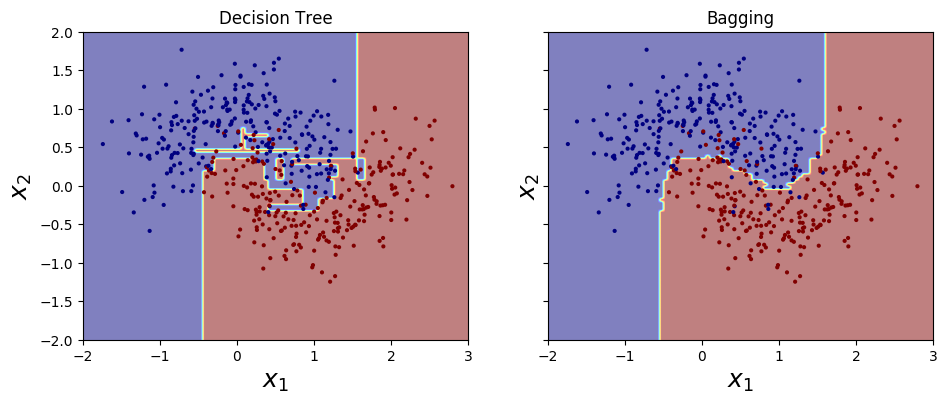

In [0]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(11,4),sharey=True)
plot_decision_boundary(ax0,tree_clf.predict, X, y,"Decision Tree")
plot_decision_boundary(ax1,bag_clf.predict, X, y,"Bagging")

Above, you can compare the decision boundary of a single Decision Tree with the decision boundary of a bagging ensemble of 500 trees. As you can see, the ensemble’s predictions will likely generalize much better than the single Decision Tree’s predictions: the ensemble has a comparable bias but a smaller variance (it makes roughly the same number of errors on the training set, but the decision boundary is less irregular).  

***A vous:*** Les graphes ci-dessous montrent un second avantage du bagging comparé au decision tree. Décrivez cet avantage ($1\heartsuit$). Peut-il faire la même chose en mode "hard voting" $(2\heartsuit)$

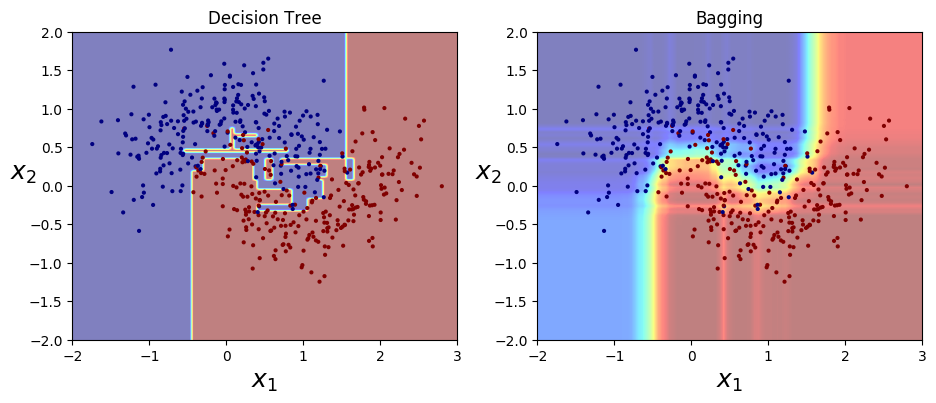

In [0]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(11,4))

def predic_func_tree(x):
  return tree_clf.predict_proba(x)[:,1]

def predic_func_bag(x):
  return bag_clf.predict_proba(x)[:,1]

"petit test"
#predic_func_tree([[1,2],[1,2],[1,2]])

plot_decision_boundary(ax0,predic_func_tree, X, y,"Decision Tree")
plot_decision_boundary(ax1,predic_func_bag, X, y,"Bagging")

### Bootstrapping or not?

Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting, but this also means that predictors end up being less correlated so the ensemble’s variance is reduced. Overall, bagging often results in better models, which explains why it is generally preferred. However, if you have spare time and CPU power you can use cross-validation to evaluate both bagging and pasting and select the one that works best.  

### out-of-bag instances $\hookleftarrow$

Denote by $m$ the size of the training . By default, a BaggingClassifier samples $m$ training instances with replacement (`bootstrap=True`).  A classical calculus shows that about 63% of the training instances are sampled on average for each predictor.
The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.

Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. You can evaluate the ensemble itself by averaging out the oob evaluations of each predictor.
In Scikit-Learn, you can set `oob_score=True` when creating a `BaggingClassifier` to request an automatic oob evaluation after training. 

***A vous:*** Faite des simulations  pour vérifier le chiffre des 63%. Plus précisément, on montre que quand $m$ devient grand, la proportion de donnée non piochée converge vers $ 1-e^{-1}$.

In [0]:
bag_clf = sklearn.ensemble.BaggingClassifier(
    sklearn.tree.DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, 
    max_samples=1.0, 
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42,
    oob_score=True
)

In [0]:
bag_clf.fit(X_train, y_train)
oob_score_=bag_clf.oob_score_
print("accuracy on oob data:",oob_score_)
"According to this oob evaluation, this BaggingClassifier is likely to achieve about %.2f accuracy on the test set."%bag_clf.oob_score_

accuracy on oob data: 0.92


'According to this oob evaluation, this BaggingClassifier is likely to achieve about 0.92 accuracy on the test set.'

 Let’s verify this:


In [0]:
y_pred = bag_clf.predict(X_test)
print("accuracy on test data:",sklearn.metrics.accuracy_score(y_test, y_pred))

accuracy on test data: 0.92


The oob decision function for each training instance is also available through the `oob_decision_function_` variable. In this case (since the base estimator has a `predict_proba()` method) the decision function returns the class probabilities for each training instance.


In [0]:
proba_oob=bag_clf.oob_decision_function_
print("proba estimated via oob:\n",proba_oob[:5])

print(proba_oob.shape)


proba estimated via oob:
 [[0.33626854 0.66373146]
 [0.43163909 0.56836091]
 [0.97257271 0.02742729]
 [0.04502706 0.95497294]
 [0.0695281  0.9304719 ]]
(375, 2)


***A vous:*** Ces probabilités correspondent à quelles instances $(1\heartsuit)$?  Si c'est clair, créez une illustration graphique $(3\diamondsuit)$. Par ex: un scatter plot où la couleur correspond à la proba. 

###  Random Patches and Random Subspaces

The BaggingClassifier class supports sampling the features as well. This is controlled by two hyperparameters: `max_features` and `bootstrap_features`. They work the same way as `max_samples` and `bootstrap`, but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.

This is particularly useful when you are dealing with high-dimensional inputs (such as images). 

* Sampling both training instances and features is called the **Random Patches method**. 
* Keeping all training instances (i.e., `bootstrap=False` and `max_samples=1.0`) but sampling features (i.e., `bootstrap_features=True` and/or `max_features` smaller than 1.0) is called the **Random Subspaces method**.

Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

## Random Forests $\hookleftarrow$

### Definition


Random Forest is a peculiar case of what we discusses previously: it is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with `max_samples` set to the size of the training set. Instead of building a `BaggingClassifier` and passing it a `DecisionTreeClassifier`, you can instead use the `RandomForestClassifier` class, which is more convenient and optimized for Decision Trees; similarly, there is a `RandomForestRegressor` class for regression tasks. 

The following code trains a Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using all available CPU cores 

In [0]:
rnd_clf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16, 
    n_jobs=-1, 
    random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [0]:
sklearn.ensemble.RandomForestClassifier?

With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.


The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier: 

In [0]:
bag_clf = sklearn.ensemble.BaggingClassifier(
        sklearn.tree.DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
        n_estimators=500, 
        max_samples=1.0, 
        bootstrap=True, 
        n_jobs=-1
    )

bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)


In [0]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.984

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features (the random subset is different for each node). This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. 

The parameter controling this is `max_features`. By default it is set to the sqaure root of the total number of features.

### Graphical illustration

***A vous:*** Expliquez $(1\heartsuit)$ ce que l'on a voulu reproduire dans le code ci-dessous.

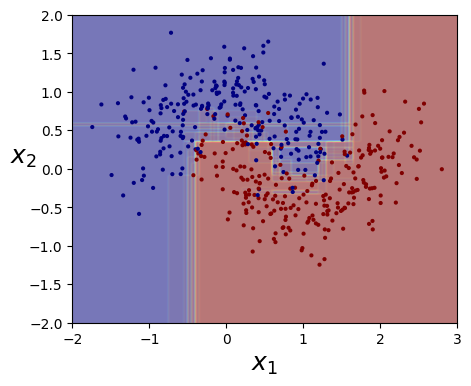

In [0]:
fig,ax=plt.subplots(1,1,figsize=(6, 4))

for i in range(15):
    tree_clf = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(ax,tree_clf.predict, X, y,  alpha=0.05, plot_data=(i==0))


###  Extra-Trees

When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier). It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is simply called an Extremely Randomized Trees ensemble (or Extra-Trees for short). Once again, this trades more bias for a lower variance. It also makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.
You can create an Extra-Trees classifier using Scikit-Learn’s ExtraTreesClassifier class. Its API is identical to the RandomForestClassifier class. Similarly, the ExtraTreesRegressor class has the same API as the RandomForestRegressor class. 


It is hard to tell in advance whether a RandomForestClassifier will perform better or worse than an ExtraTreesClassifier. Generally, the only way to know is to try both and compare them using cross-validation (and tuning the hyperparameters using grid search).

### Feature importance

Lastly, if you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. Scikit-Learn computes this automatically for every feature after training. You can access the result using the feature_importances_ variable. For example, the following code trains a RandomForestClassifier on the iris dataset (introduced in Chapter 4) and outputs each feature’s importance. It seems that the most important features are the petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively)

In [0]:
iris = sklearn.datasets.load_iris()
rnd_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


## AdaBoost

### Intro 

Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are AdaBoost (short for Adaptive Boosting) and Gradient Boosting. Let’s start with AdaBoost. 


One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.
For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

In [0]:
ada_clf = sklearn.ensemble.AdaBoostClassifier(
    sklearn.tree.DecisionTreeClassifier(max_depth=1), 
    n_estimators=200,
    algorithm="SAMME.R", 
    learning_rate=0.5, 
    random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

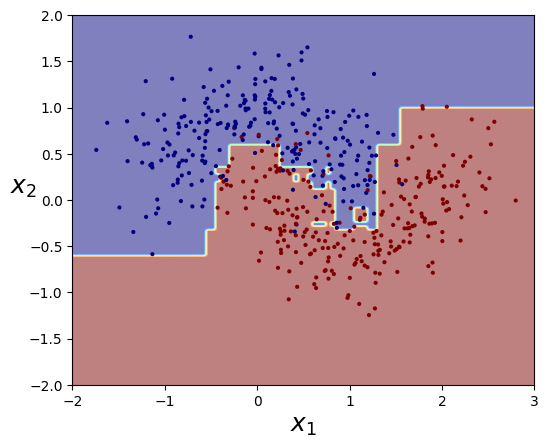

In [0]:
fig,ax=plt.subplots()
plot_decision_boundary(ax,ada_clf.predict, X, y)

### Step by step

***A vous:*** 

* $(1\heartsuit)$ Ajoutez  des commentaires ligne à ligne dans le programme suivant, pour expliquer la technique le d'adaboost.
* $(4\heartsuit)$ Clairement, l'apprentissage échoue. Expliquez ce qui se passe. Corrigez en jouant les les hyper-paramètre `C` et `learning_rate`.


Aide:  
* `C` est la constance de régularisation d'un SVM. C'est l'inverse de "alpha": plus `C` est grand, et moins le modèle est régulier. 
* `learning_rate`: vous devez pouvoir comprendre dans le programme comment cela fonctionne. 




/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

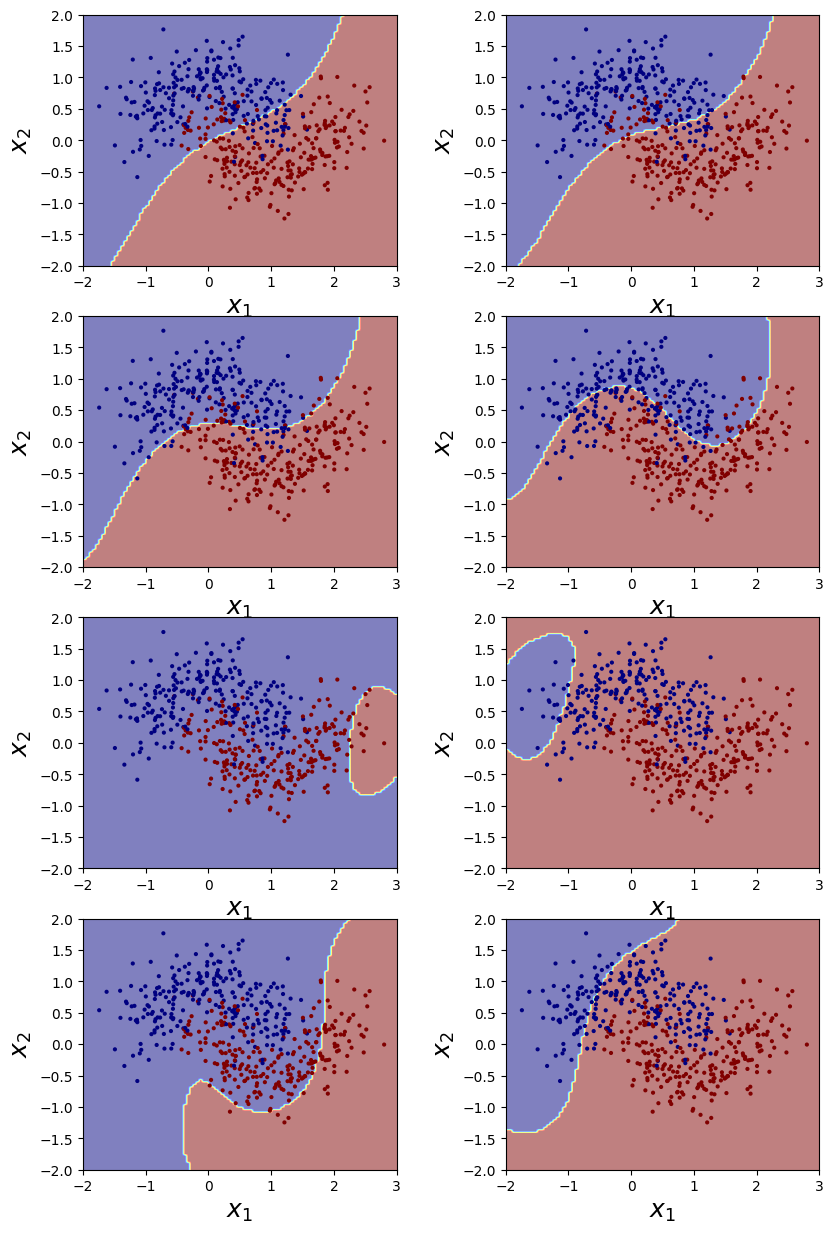

In [0]:
fig,axs=plt.subplots(4,2,figsize=(10,15))
axs=axs.reshape(-1)

m = len(X_train)
learning_rate=1
sample_weights = np.ones(m)


for i in range(len(axs)):
    svm_clf = sklearn.svm.SVC(kernel="rbf", C=0.03, random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = svm_clf.predict(X_train)
    sample_weights[y_pred != y_train] *= (1 + learning_rate)
    plot_decision_boundary(axs[i],svm_clf.predict, X, y)
    
    

***Tip:*** If your AdaBoost ensemble is overfitting the training set, you can try reducing the number of estimators or more strongly regularizing the base estimator.

### drawback

There is one important drawback to this sequential learning technique: it cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as bagging or pasting. 

## Gradient Boosting $\hookleftarrow$

### explanation

Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.
Let’s go through a simple regression example using Decision Trees as the base predictors. This is called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). 


### Experimentation

In [0]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [0]:
tree_reg1 = sklearn.tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y);

In [0]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = sklearn.tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2);

In [0]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = sklearn.tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3);

In [0]:
X_new = np.array([[0.8]])

In [0]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [0]:
y_pred

array([0.75026781])

Text(0,0.5,'$y$')

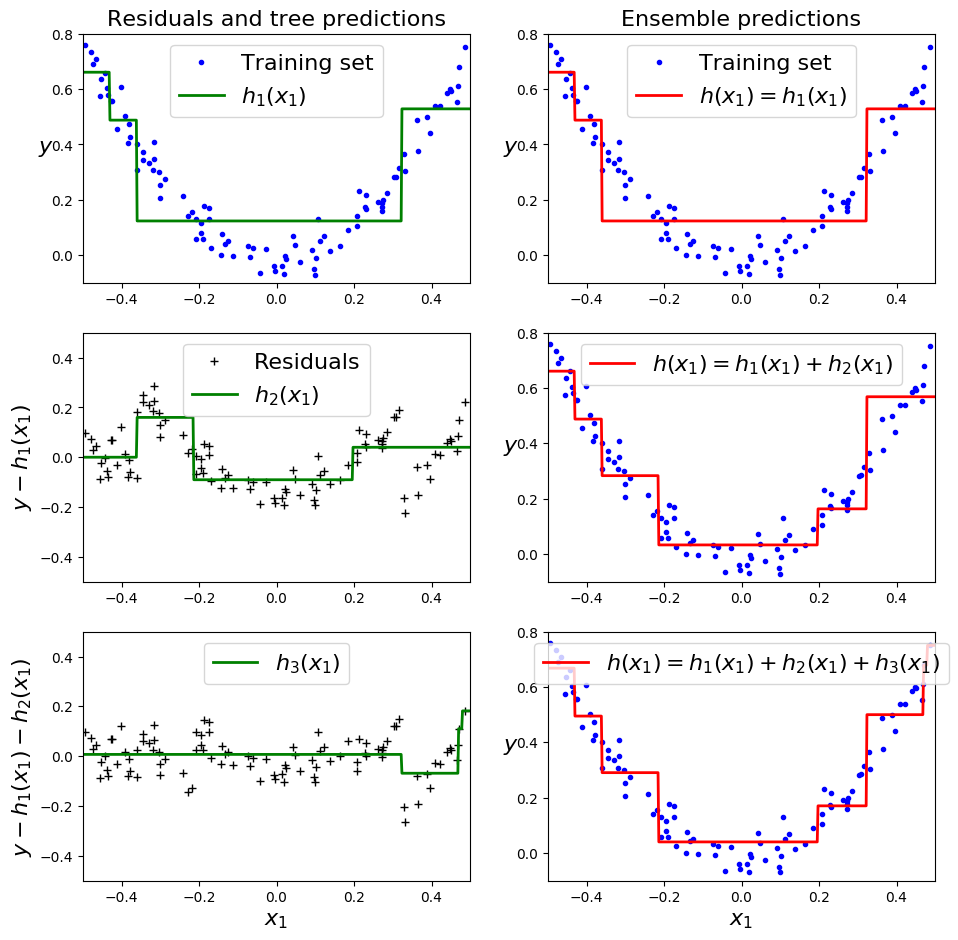

In [0]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRegressor class. Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on), as well as hyperparameters to control the ensemble training, such as the number of trees (n_estimators). The following code creates the same ensemble as the previous one: 

In [0]:
gbrt = sklearn.ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X, y);

In [0]:
gbrt_slow = sklearn.ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y);

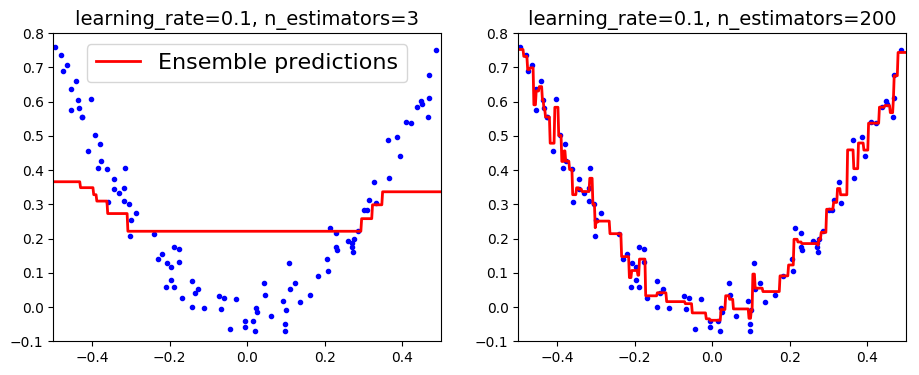

In [0]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14);


The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called shrinkage. 

***A vous:*** Trouvez de meilleurs paramètres $(2\heartsuit)$ à la main (plusieurs solutions possibles) . 

### with early stopping

In order to find the optimal number of trees, you can use early stopping (il s'agit d'arréter le rafinement de modèle dès que l'erreur de validation remonte). A simple way to implement this is to use `the staged_predict()` method: it returns an iterator over the predictions made by the ensemble at each stage of training (with one tree, two trees, etc.). The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees: 

In [0]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=49)

gbrt = sklearn.ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [np.mean( (y_val- y_pred)**2) for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = sklearn.ensemble.GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train);

In [0]:
min_error = np.min(errors)

Text(0.5,1,'Best model (55 trees)')

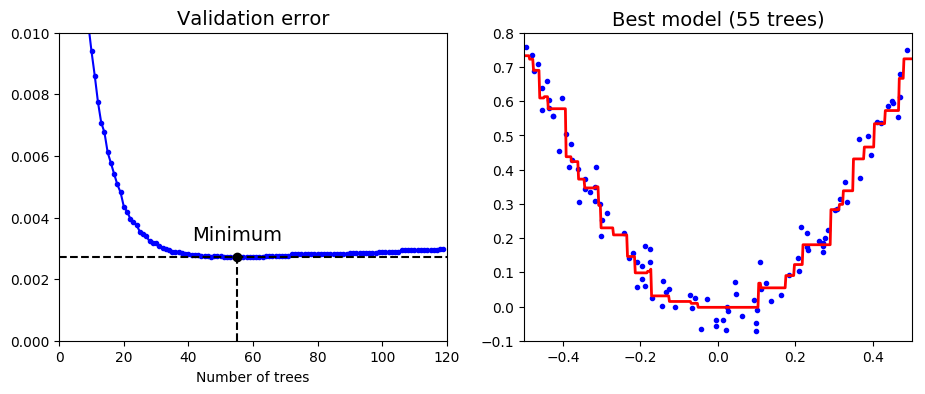

In [0]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

It is also possible to implement early stopping by actually stopping training early (instead of training a large number of trees first and then looking back to find the optimal number). You can do so by setting warm_start=True, which makes Scikit-Learn keep existing trees when the fit() method is called, allowing incremental training. The following code stops training when the validation error does not improve for five iterations in a row: 

In [0]:
gbrt = sklearn.ensemble.GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = np.mean ((y_val-y_pred)**2)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [0]:
print(gbrt.n_estimators)

61


In [0]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


### Subsample

The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. For example, if subsample=0.25, then each tree is trained on 25% of the training instances, selected randomly. As you can probably guess by now, this trades a higher bias for a lower variance. It also speeds up training considerably. This technique is called Stochastic Gradient Boosting. 

***Note:***  It is possible to use Gradient Boosting with other cost functions. This is controlled by the loss hyperparameter (see Scikit-Learn’s documentation for more details). 

## Questions 


*  $(2\heartsuit)$ If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?

*  $(1\heartsuit)$ What is the difference between hard and soft voting classifiers?

* $(1\heartsuit)$ Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles?

* $(1\heartsuit)$ What is the benefit of out-of-bag evaluation?

* $(1\heartsuit)$ What makes Extra-Trees more random than regular Random Forests? How can this extra randomness help? Are ExtraTrees slower or faster than regular Random Forests?

* $(2\heartsuit)$ If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

* $(1\heartsuit)$ If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?






## Exemple: Voting Classifier on MNIST $\hookleftarrow$


Load the MNIST data, and split it into a training set, a validation set, and a test set. Then train various classifiers. Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier. How much better does it perform compared to the individual classifiers? 


In [0]:
"le mnist avec les 70 000 images 28*28, mais c'est bien trop long"
#mnist = sklearn.datasets.fetch_mldata('MNIST original')
"on va utiliser le petit mnist"
mnist = sklearn.datasets.load_digits()
mnist.data.shape

(1797, 64)

Train/validation/test split

In [0]:
nb_data=len(mnist.data)
X_train_val, X_test, y_train_val, y_test = sklearn.model_selection.train_test_split(
    mnist.data, mnist.target, test_size=nb_data//10, random_state=42)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X_train_val, y_train_val, test_size=len(X_train_val)//9, random_state=42)

train various classifiers

In [0]:
random_forest_clf = sklearn.ensemble.RandomForestClassifier(random_state=42)
extra_trees_clf = sklearn.ensemble.ExtraTreesClassifier(random_state=42)
mlp_clf = sklearn.neural_network.MLPClassifier(random_state=42)

In [0]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf)
]

In [0]:
voting_clf = sklearn.ensemble.VotingClassifier(named_estimators)



On voit que par défaut, il s'agit d'un hard voter

In [0]:
voting_clf.voting

'hard'

We train all the models

In [0]:
voting_clf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
" the score of a classifier is the accuracy"
voting_clf.score(X_val, y_val)

0.9497206703910615

Let's look at the individual performances

In [0]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.8994413407821229, 0.9553072625698324, 0.9664804469273743]

Let's remove the worse one:

In [0]:
del voting_clf.estimators_[0]

***warning:***  `estimators_` gives the trained already trained, while `estimators` give the list of the model decalred when we created the `VotingClassifier`. So above, if we did 

    del voting_clf.estimators[0]
    
the `random_forest_clf` would stays active.

Now let's evaluate the `VotingClassifier` again:

In [0]:
voting_clf.score(X_val, y_val)

0.9608938547486033

Much better! The random-forest-classifier was hurting performance. Now let's try using a soft voting classifier:

In [0]:
voting_clf.voting = "soft"

In [0]:
voting_clf.score(X_val, y_val)

0.9776536312849162

That's a significant improvement, and it's  better than each of the individual classifiers.

And on test set?

In [0]:
voting_clf.score(X_test, y_test)

0.9832402234636871

In [0]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9608938547486033, 0.9776536312849162]

Not too bad!